# **Salary Prediction Based on Job Features**

## **Dataset**
The LinkedIn Job Postings Dataset on Kaggle
https://www.kaggle.com/datasets/arshkon/linkedin-job-postings

**Description:**

The LinkedIn Job Postings dataset, collected over a span of two days, offers a rich and expansive repository of over 15,000 job postings. Each individual job posting within the dataset comprises 27 distinct attributes. The dataset's extensive scope presents a multitude of exploration possibilities (Kon, 2023).


## **Problem Statement**
In the competitive job landscape, hiring managers are faced with the challenge of making data-driven salary offers to job applicants. To address this challenge, the goal is to develop a machine learning model that accurately estimates an individual's salary based on their experience level and other job-related features such as work type, benefits, and industry. This model will serve as a negotiation support system for hiring managers in the United States, enabling them to make informed decisions regarding an individual's salary.


## **Machine Learning Solution**

The project aims to develop a regression model that predicts a person's salary in the United States. The choice of regression is appropriate for predicting a continuous target variable like salary. The features considered include title, experience level, work type, benefits, and industry. These features are likely to have a significant impact on salary, making them valuable predictors for the model.

The LinkedIn Job Postings Dataset will be preprocessed to ensure its quality and suitability for this project.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
jobs = pd.read_csv('job_postings.csv')
jobs

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,1.708300e+12,NaN,NaN,NaN,1.692750e+12,NaN,1,FULL_TIME,USD,BASE_SALARY
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,1.695430e+12,NaN,NaN,NaN,1.692830e+12,NaN,0,FULL_TIME,NaN,NaN
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,1.695320e+12,NaN,NaN,NaN,1.692730e+12,NaN,0,CONTRACT,NaN,NaN
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,1.695420e+12,NaN,NaN,NaN,1.692830e+12,NaN,0,FULL_TIME,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,1.708420e+12,NaN,NaN,NaN,1.692870e+12,NaN,1,FULL_TIME,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,3701373516,74718032.0,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",NaN,NaN,NaN,NaN,Part-time,"West Columbia, SC",...,1.695340e+12,NaN,Entry level,NaN,1.692740e+12,aspirebakeriescareers.com,0,PART_TIME,NaN,NaN
15882,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,NaN,NaN,NaN,NaN,Full-time,"Teaneck, NJ",...,1.695340e+12,NaN,Entry level,NaN,1.692740e+12,recruiting.ultipro.com,0,FULL_TIME,NaN,NaN
15883,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",...,1.695340e+12,NaN,Entry level,NaN,1.692740e+12,recruiting.ultipro.com,0,PART_TIME,NaN,NaN
15884,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,135000.0,NaN,110000.0,YEARLY,Full-time,"New York, NY",...,1.695340e+12,NaN,Mid-Senior level,NaN,1.692740e+12,opportunities.columbia.edu,0,FULL_TIME,USD,BASE_SALARY


# **My review and understanding of the dataset**

The main dataset (job_postings.csv) has 27 features. Upon my review of each feature, I found that only 11 are essential to this project as follows:

1.  job_id: The job ID as defined by LinkedIn (https://www.linkedin.com/jobs/view/ job_id )
2.  
company_id: Identifier for the company associated with the job posting (maps to companies.csv)
3.  
title: The job title

2.  max_salary: Maximum salary

3.  
med_salary: Median salary
4.  
min_salary: Minimum salary
5.  
pay_period: Pay period for salary (Hourly, Monthly, Yearly)
6.  
formatted_work_type: Type of work (Fulltime, Parttime, Contract)
7.  
remote_allowed: Whether job permits remote work
8.  
formatted_experience_level: Job experience level (entry, associate, executive, etc)
9.  
currency: Currency in which the salary is provided.


In [ ]:
# Remove irrelevant columns
jobs.drop(columns=['description', 'location', 'applies', 'original_listed_time', 'views', 'job_posting_url', 'application_url', 'application_type', 'expiry', 'closed_time', 'skills_desc', 'listed_time', 'posting_domain', 'sponsored', 'work_type', 'compensation_type'], axis=0, inplace=True)
print(jobs.shape)
jobs.head()

(15886, 11)


,job_id,company_id,title,max_salary,med_salary,min_salary,pay_period,formatted_work_type,remote_allowed,formatted_experience_level,currency
0,85008768,NaN,Licensed Insurance Agent,52000.0,NaN,45760.0,YEARLY,Full-time,NaN,NaN,USD
1,133114754,77766802.0,Sales Manager,NaN,NaN,NaN,NaN,Full-time,NaN,NaN,NaN
2,133196985,1089558.0,Model Risk Auditor,NaN,NaN,NaN,NaN,Contract,NaN,NaN,NaN
3,381055942,96654609.0,Business Manager,NaN,NaN,NaN,NaN,Full-time,NaN,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,NaN,NaN,NaN,NaN,Full-time,NaN,NaN,NaN


In [ ]:
#Check dataframe details

jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15886 entries, 0 to 15885
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      15886 non-null  int64  
 1   company_id                  15520 non-null  float64
 2   title                       15886 non-null  object 
 3   max_salary                  5521 non-null   float64
 4   med_salary                  981 non-null    float64
 5   min_salary                  5521 non-null   float64
 6   pay_period                  6502 non-null   object 
 7   formatted_work_type         15886 non-null  object 
 8   remote_allowed              2340 non-null   float64
 9   formatted_experience_level  10984 non-null  object 
 10  currency                    6502 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.3+ MB


In [ ]:
#check if there is duplicate in the job_id and company_id columns
duplicate1 = jobs['job_id'].duplicated()
print(duplicate1.value_counts())

duplicate2 = jobs['company_id'].duplicated()
duplicate2.value_counts()

#since a company can have several job postings, the duplicate in company_id is understandable

False    15886
Name: job_id, dtype: int64


True     9855
False    6031
Name: company_id, dtype: int64

In [ ]:
#Check for unique values
print(jobs['pay_period'].unique())                #Standardize pay_period to yearly basis (done below)
print(jobs['formatted_work_type'].unique())       #Make consistent - 'Full-time', 'Part-time' and 'Temporary'
print(jobs['remote_allowed'].unique())            #1 means yes and nan= no. Map accordingly
print(jobs['formatted_experience_level'].unique())#Map nan to the most frequent and Internship to Entry level
print(jobs['currency'].unique())                  #Only USD so this column is redundant (remove below)

['YEARLY' nan 'HOURLY' 'MONTHLY']
['Full-time' 'Contract' 'Part-time' 'Internship' 'Other' 'Temporary'
 'Volunteer']
[nan  1.]
[nan 'Entry level' 'Associate' 'Mid-Senior level' 'Director' 'Executive'
 'Internship']
['USD' nan]


# **Data Cleaning, EDA and Feature Engineering**

In [ ]:
#'formatted_work_type'column has values - nan 'Entry level' 'Associate' 'Mid-Senior level' 'Director' 'Executive' and 'Internship'
#Most contract positions, even though it is for a term, are usually full-time. Volunteers work part-time and Internship is a temporary position
#Make 'formatted_work_type'column consistent as follows:
#'Full-time' = 'Full-time', 'Contract', and 'Other'
#'Part-time' = 'Part-time', and 'Volunteer'
#'Temporary' = 'Temporary', and 'Internship'

# Create a dictionary for replacement
replace_1 = {
    'Contract': 'Full-time',
    'Other': 'Full-time',
    'Volunteer': 'Part-time',
    'Internship': 'Temporary'
}

# Replace values in the 'formatted_work_type' column using the dictionary
jobs['formatted_work_type'] = jobs['formatted_work_type'].replace(replace_1)

In [ ]:
#'remote_allowed'column has values - 1 and nan. Map 1 to yes and nan to no
jobs['remote_allowed'] = jobs['remote_allowed'].replace({1: 'Yes', np.nan: 'No'})


In [ ]:
#'formatted_experience_level'column has values - 'nan' 'Entry level' 'Associate' 'Mid-Senior level' 'Director' 'Executive' and 'Internship'
#Internship is usually an entry level position. Replace 'Internship' with 'Entry level'
#Also, Executive job titles include those with director in their job title
jobs['formatted_experience_level'] = jobs['formatted_experience_level'].replace({'Internship': 'Entry level'})
jobs['formatted_experience_level'] = jobs['formatted_experience_level'].replace({'Director': 'Executive'})

#Map 'nan' to the most frequent value
print(jobs['formatted_experience_level'].isna().sum())
print(jobs['formatted_experience_level'].mode())
jobs['formatted_experience_level'] = jobs['formatted_experience_level'].replace({ np.nan: 'Mid-Senior level'})

jobs

4902
0    Mid-Senior level
Name: formatted_experience_level, dtype: object


,job_id,company_id,title,max_salary,med_salary,min_salary,pay_period,formatted_work_type,remote_allowed,formatted_experience_level,currency
0,85008768,NaN,Licensed Insurance Agent,52000.0,NaN,45760.0,YEARLY,Full-time,No,Mid-Senior level,USD
1,133114754,77766802.0,Sales Manager,NaN,NaN,NaN,NaN,Full-time,No,Mid-Senior level,NaN
2,133196985,1089558.0,Model Risk Auditor,NaN,NaN,NaN,NaN,Full-time,No,Mid-Senior level,NaN
3,381055942,96654609.0,Business Manager,NaN,NaN,NaN,NaN,Full-time,No,Mid-Senior level,NaN
4,529257371,1244539.0,NY Studio Assistant,NaN,NaN,NaN,NaN,Full-time,No,Mid-Senior level,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15881,3701373516,74718032.0,Sanitation Technician,NaN,NaN,NaN,NaN,Part-time,No,Entry level,NaN
15882,3701373522,38897.0,Unit Secretary,NaN,NaN,NaN,NaN,Full-time,No,Entry level,NaN
15883,3701373523,38897.0,"Radiology Aide, Perdiem",NaN,NaN,NaN,NaN,Part-time,No,Entry level,NaN
15884,3701373524,2623.0,MRI Manager,135000.0,NaN,110000.0,YEARLY,Full-time,No,Mid-Senior level,USD


**Target Feature = Salary**

Currently, the salary column has 5,521 values. I applied some data cleaning to improve this.


In [ ]:
#Used values in 'med_salary' to fill missing values in 'min_salary' and 'max_salary'. This increased values fron 5521 to 6502
jobs['min_salary'].fillna(jobs['med_salary'], inplace=True)
jobs['max_salary'].fillna(jobs['med_salary'], inplace=True)

#Create a new column 'salary' from the average of 'min_salary' and 'max_salary' values
jobs['salary'] = (jobs['min_salary'] + jobs['max_salary']) / 2

#Drop max, med and in salary columns. They are no longer required/relevant
jobs.drop(columns=['max_salary', 'med_salary', 'min_salary'], axis=0, inplace=True)

jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15886 entries, 0 to 15885
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      15886 non-null  int64  
 1   company_id                  15520 non-null  float64
 2   title                       15886 non-null  object 
 3   pay_period                  6502 non-null   object 
 4   formatted_work_type         15886 non-null  object 
 5   remote_allowed              15886 non-null  object 
 6   formatted_experience_level  15886 non-null  object 
 7   currency                    6502 non-null   object 
 8   salary                      6502 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.1+ MB


In [ ]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
#https://pandas.pydata.org/docs/dev/reference/api/pandas.DataFrame.map.html
#https://stackoverflow.com/questions/67988357/how-to-use-pandas-map-function-without-overwriting-items-that-do-not-match
# mean_salary_by_title = jobs.groupby(['title'])['salary'].mean()
# jobs['salary'].fillna(jobs['title'].map(mean_salary_by_title), inplace=True)
# I did not use mean because pay-period is different ('YEARLY' nan 'HOURLY' 'MONTHLY')

#https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html
#https://stackoverflow.com/questions/59697994/what-does-transformfirst-do
#'first()'on the grouped Series returns first value for each group in the form of a Series where the group labels are the index
#Can cause issues when trying to use this Series to fill missing values because the indices may not align with the indices of the original DataFrame.
#'transform('first')' broadcasts the first value of each group to all elements in that group in the original DataFrame, ensuring that the indices align properly.

#Use first occurrence of salary, grouped by title and experience level to fill in missing values in the 'salary' column.
#This increased 'salary' column from 6502 to 7936
jobs['group_salary'] = jobs.groupby(['title', 'formatted_experience_level'])['salary'].transform('first')
jobs['salary'].fillna(jobs['group_salary'], inplace=True)
jobs.drop(columns=['group_salary'], inplace=True)


In [ ]:
#dropped rows that have missing values in salary column
jobs.dropna(subset=['salary'], inplace=True)
print(jobs.shape)
jobs.info()

(7936, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7936 entries, 0 to 15884
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      7936 non-null   int64  
 1   company_id                  7743 non-null   float64
 2   title                       7936 non-null   object 
 3   pay_period                  6502 non-null   object 
 4   formatted_work_type         7936 non-null   object 
 5   remote_allowed              7936 non-null   object 
 6   formatted_experience_level  7936 non-null   object 
 7   currency                    6502 non-null   object 
 8   salary                      7936 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 620.0+ KB


**Standardize target (salary) to yearly basis**

In [ ]:
#for loop to standardize salary values to yearly rates
#https://towardsdatascience.com/efficiently-iterating-over-rows-in-a-pandas-dataframe-7dd5f9992c01
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iterrows.html
#https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas

# Initialize a list to store standardized salaries
yearly_salaries = []

# Iterate through the rows and standardize salaries
for index, row in jobs.iterrows():
    salary = row['salary']
    pay_period = row['pay_period']

    if not pd.isna(salary):
        if not pd.isna(pay_period):
            if pay_period == 'YEARLY':
                yearly_salaries.append(salary)
            elif pay_period == 'MONTHLY':
                yearly_salaries.append(salary * 12)
            elif pay_period == 'HOURLY':
                yearly_salaries.append(salary * 2080)  # Assuming 40 hours/week, 52 weeks/year
        else:
            if salary >= 20000:
                yearly_salaries.append(salary)  # Leave salary as is
            elif 1000 <= salary < 20000:
                yearly_salaries.append(salary * 12)
            else:
                yearly_salaries.append(salary * 2080)
    else:
        yearly_salaries.append(None)  # Handle cases where salary is NaN

# Add the standardized salaries to the DataFrame
jobs['yearly_salary'] = yearly_salaries


In [ ]:
# since we now have yearly salary, the pay_period and salary columns are no longer required
jobs.drop(columns=['pay_period', 'salary'], axis=0, inplace=True)
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7936 entries, 0 to 15884
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      7936 non-null   int64  
 1   company_id                  7743 non-null   float64
 2   title                       7936 non-null   object 
 3   formatted_work_type         7936 non-null   object 
 4   remote_allowed              7936 non-null   object 
 5   formatted_experience_level  7936 non-null   object 
 6   currency                    6502 non-null   object 
 7   yearly_salary               7936 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 558.0+ KB


# **Other csv files**

I also reviewed other csv files in the LinkedIn Job Postings dataset and found that it contains some essential features that will be useful for this project, as listed below:

A.  company_details/company_industries.csv
1.  
company_id: Identifier for the company associated with the job posting
2.  
Industry: The industry or sector that the company belongs to

B.  company_details/companies.csv
1.  
company_id: The company ID as defined by LinkedIn
2.  
company_size: Company grouping based on number of employees (0 Smallest - 7 Largest)
3.  
country: Country of company headquarters.
4.  
state: State of company headquarters.

C.  job_details/benefits.csv
1.  
job_id: The job ID
2.  
type: Type of benefit provided (401K, Medical Insurance, etc)

I will merge these with my jobs dataframe

# **Merge, Join, Concatenate**
https://pandas.pydata.org/docs/user_guide/merging.html


**Industry**

In [ ]:
Ind = pd.read_csv('company_industries.csv')
Ind.head()

,company_id,industry
0,81149246,Higher Education
1,10033339,Information Technology & Services
2,6049228,Accounting
3,2641066,Electrical & Electronic Manufacturing
4,96649998,Marketing & Advertising


In [ ]:
print(Ind.shape)
Ind.drop_duplicates(subset='company_id', keep='first', inplace=True)
Ind.shape

(15880, 2)


(6003, 2)

In [ ]:
jobs = pd.merge(jobs, Ind, on='company_id', how='left')
#jobs.head()

**Company details**

In [ ]:
company_details = pd.read_csv('companies.csv')

#drop irrelevant columns
company_details.drop(columns = ['name', 'description', 'city',	'zip_code',	'address',	'url'], axis=0, inplace=True)
company_details.head()


,company_id,company_size,state,country
0,1009,7.0,NY,US
1,1016,7.0,0,US
2,1021,7.0,NY,US
3,1025,7.0,Texas,US
4,1028,7.0,Texas,US


In [ ]:
#check if there is duplicate in the company_id columns. No duplicates
duplicate_2 = company_details['company_id'].duplicated()
print(duplicate_2.value_counts())

False    6063
Name: company_id, dtype: int64


In [ ]:
#Based on the proposed ML Solution stated above, I will limit the scope of this dataset to US companies only
company_details = company_details[company_details['country'] == 'US']
print(company_details['country'].unique())


#Standardize stat column using US alpha code https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=53971
# Remove white spaces after values in the specified column
company_details['state'] = company_details['state'].str.strip()
#print(company_details['state'].unique())
#Create a dictionary for replacement
alpha_code = {'Alabama' : 'AL',
           'Alaska' : 'AK',
           'Arizona' : 'AZ',
           'Arkansas'	: 'AR',
           'California'	: 'CA',
           'Colorado'	: 'CO',
           'Connecticut'	: 'CT',
           'Delaware'	: 'DE',
           'District of Columbia'	: 'DC',
           'Florida'	: 'FL',
           'Georgia' : 'GA',
           'Hawaii'	: 'HI',
           'Idaho'	: 'ID',
           'Illinois'	: 'IL',
           'Indiana'	: 'IN',
           'Iowa'	: 'IA',
           'Kansas'	: 'KS',
           'Kentucky'	: 'KY',
           'Louisiana'	: 'LA',
           'Maine'	: 'ME',
           'Maryland'	: 'MD',
           'Massachusetts'	: 'MA',
           'Michigan'	: 'MI',
           'Minnesota'	: 'MN',
           'Mississippi'	: 'MS',
           'Missouri'	: 'MO',
           'Montana'	: 'MT',
           'Nebraska'	: 'NE',
           'Nevada'	: 'NV',
           'New Hampshire'	: 'NH',
           'New Jersey'	: 'NJ',
           'New Mexico'	: 'NM',
           'New York'	: 'NY',
           'North Carolina'	: 'NC',
           'North Dakota'	: 'ND',
           'Ohio'	: 'OH',
           'Oklahoma'	: 'OK',
           'Oregon'	: 'OR',
           'Pennsylvania'	: 'PA',
           'Rhode Island'	: 'RI',
           'South Carolina'	: 'SC',
           'South Dakota'	: 'SD',
           'Tennessee'	: 'TN',
           'Texas'	: 'TX',
           'Utah'	: 'UT',
           'Vermont'	: 'VT',
           'Virginia'	: 'VA',
           'Washington'	: 'WA',
           'West Virginia'	: 'WV',
           'Wisconsin'	: 'WI',
           'Wyoming'	: 'WY',
              'ma' : 'MA',
              'mi' : 'MI',
              'wa' : 'WA',
              'il' : 'IL',
              'Fl' : 'FL',
              'fl' : 'FL',
              'md' : 'MD',
              'D.C.' : 'DC',
              'ga' : 'GA',
              'ca' : 'CA',
              'Il' : 'IL',
              'co' :'CO',
              'CALIFORNIA' : 'CA',
              'NY - New York' : 'NY',
              'CA - California' : 'CA',
              'tx' : 'TX',
              'wi' : 'WI',
              'Al' : 'AL',
              'Calif.' : 'CA',
              'Georgia (GA)' : 'GA',
              'Ca' : 'CA',
              'CA.' : 'CA',
              'Wi' : 'WI',
              'Wa' : 'WA',
              'N.J.' : 'NJ',
              'CO.' : 'CO',
              'iowa' : 'IA',
              'Lincolnwood, Illinois' : 'IL',
              'MICHIGAN' : 'MI',
              'Washington D.C.' : 'WA',
              'In' : 'IN',
              'TEXAS' : 'TX',
              'NewJersey' : 'NJ',
              'ct' : 'CT',
              'Mi' : 'MI',
              'maryland' : 'MD',
              'Az' : 'AZ',
              'Pa' : 'PA',
              'Ilinois' : 'IL',
              'GEORGIA' : 'GA',
              'DELAWARE (DE)' : 'DE',
              'Co' : 'CO',
              'FLORIDA' : 'FL',
               'Tx' : 'TX',
               'Ma' : 'MA',
              'MARYLAND' : 'MD',
              'Illinos' : 'IL',
              'NewYork' : 'NY',
              'pa' : 'PA'}

#Replace values in the 'formatted_work_type' column using the dictionary
company_details['state'] = company_details['state'].replace(alpha_code)

#Drop specified rows in state column
#Tilda ~ negates results
drop_values = ['Ireland', 'Greater London', '28801', '94086', '01824']
company_details = company_details[~company_details['state'].isin(drop_values)]

#Replace 'USA', '0' (which means worldwide) and nan values with the most frequent state
#iloc[0] will extract the first (most frequent) value from the mode result
# List of values to replace
replace_values = ['USA', '0']
# Replace specified values with NaN
company_details['state'].replace(replace_values, np.nan, inplace=True)
# Replace NaN values with the most frequent state
most_frequent_state = company_details['state'].mode().iloc[0]
company_details['state'].fillna(most_frequent_state, inplace=True)

print(company_details['state'].unique())


['US']
['NY' 'CA' 'TX' 'NJ' 'OH' 'NC' 'PA' 'MA' 'CT' 'WA' 'VA' 'IL' 'MI' 'MN'
 'GA' 'IN' 'WI' 'MD' 'AZ' 'AR' 'ID' 'FL' 'RI' 'MT' 'TN' 'MO' 'UT' 'KY'
 'CO' 'IA' 'NM' 'NH' 'DC' 'OK' 'WV' 'NV' 'SC' 'OR' 'ND' 'KS' 'NE' 'AL'
 'DE' 'LA' 'SD' 'AK' 'VT' 'HI' 'ME' 'MS' 'WY']


<ipython-input-20-9207780d5b44>:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_details['state'].replace(replace_values, np.nan, inplace=True)
<ipython-input-20-9207780d5b44>:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_details['state'].fillna(most_frequent_state, inplace=True)


In [ ]:
jobs = pd.merge(jobs, company_details, on='company_id', how='left')
#jobs.head()

**Benefits**

In [ ]:
benefits = pd.read_csv('benefits.csv')
#drop irrelevant columns
benefits.drop(columns = ['inferred'], axis=0, inplace=True)
benefits.head()

,job_id,type
0,3690843087,Medical insurance
1,3690843087,Dental insurance
2,3690843087,401(k)
3,3690843087,Paid maternity leave
4,3690843087,Disability insurance


In [ ]:
# Create a new DataFrame to store unique 'job_id' and their corresponding 'benefits'
unique_job_ids = jobs['job_id'].unique()
benefits_type = []

# Iterate through unique 'job_id' and determine 'benefits' based on set conditions
for job_id in unique_job_ids:
    insurance = benefits[benefits['job_id'] == job_id]
    if any(insurance['type'].isin(['Medical insurance', 'Dental insurance', 'Vision insurance'])):
        benefits_type.append({'job_id': job_id, 'benefits': 'Basic'})
    elif any(insurance['type'].isin(['Paid maternity leave', 'Commuter benefits', 'Disability insurance'])):
        benefits_type.append({'job_id': job_id, 'benefits': 'Standard'})
    else:
        benefits_type.append({'job_id': job_id, 'benefits': 'Premium'})

# Create the 'benefits' DataFrame
benefits_df = pd.DataFrame(benefits_type)

# Merge the 'jobs' DataFrame and the 'benefits' DataFrame on 'job_id'
jobs = pd.merge(jobs, benefits_df, on='job_id', how='left')

print(jobs['benefits'].unique())
jobs.head()

['Basic' 'Premium' 'Standard']


,job_id,company_id,title,formatted_work_type,remote_allowed,formatted_experience_level,currency,yearly_salary,industry,company_size,state,country,benefits
0,85008768,NaN,Licensed Insurance Agent,Full-time,No,Mid-Senior level,USD,48880.0,NaN,NaN,NaN,NaN,Basic
1,133114754,77766802.0,Sales Manager,Full-time,No,Mid-Senior level,NaN,90000.0,Transportation/Trucking/Railroad,1.0,CA,US,Basic
2,381055942,96654609.0,Business Manager,Full-time,No,Mid-Senior level,NaN,80080.0,Religious Institutions,2.0,TX,US,Premium
3,903408693,3894635.0,Office Associate,Full-time,No,Mid-Senior level,USD,39500.0,Retail,2.0,GA,US,Premium
4,967848246,18995316.0,Education Manager,Full-time,Yes,Mid-Senior level,NaN,53500.0,Computer Software,2.0,FL,US,Premium


In [ ]:
#Drop columns that are no longer required
jobs.drop(columns = ['job_id', 'company_id', 'currency', 'country'], axis=0, inplace=True)


In [ ]:
jobs.rename(columns={'formatted_work_type': 'work_type',
                   'formatted_experience_level': 'experience'}, inplace=True)

jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7936 entries, 0 to 7935
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           7936 non-null   object 
 1   work_type       7936 non-null   object 
 2   remote_allowed  7936 non-null   object 
 3   experience      7936 non-null   object 
 4   yearly_salary   7936 non-null   float64
 5   industry        7728 non-null   object 
 6   company_size    6751 non-null   float64
 7   state           7080 non-null   object 
 8   benefits        7936 non-null   object 
dtypes: float64(2), object(7)
memory usage: 620.0+ KB


In [ ]:
#dropped rows that have missing values in industry column
jobs.dropna(subset=['industry'], inplace=True)

# Replace NaN values in company size column with the most frequent value
most_frequent_1 = jobs['company_size'].mode().iloc[0]
jobs['company_size'].fillna(most_frequent_1, inplace=True)

# Replace NaN values in state column with the most frequent state
most_frequent_2 = jobs['state'].mode().iloc[0]
jobs['state'].fillna(most_frequent_2, inplace=True)

In [ ]:
jobs.isna().sum()

title             0
work_type         0
remote_allowed    0
experience        0
yearly_salary     0
industry          0
company_size      0
state             0
benefits          0
dtype: int64

In [ ]:
# Check for duplicates
duplicate_rows = jobs.duplicated()
duplicate_rows.value_counts()

False    6569
True     1159
dtype: int64

In [ ]:
# drop duplicates
jobs = jobs[~duplicate_rows]
jobs.duplicated().value_counts()

False    6569
dtype: int64

In [ ]:
# Check salaries below $10,000
#jobs[jobs['yearly_salary'] < 10000]

#Remove rows that have salaries below $10,000
jobs = jobs[jobs['yearly_salary'] >= 10000]

In [ ]:
#check single entries by column
for column in jobs.columns:
    count = jobs[column].value_counts()
    count_of_ones = count[count == 1]
    column_sum = count_of_ones.sum()
    print(f"{column} = {column_sum}")

title = 3988
work_type = 0
remote_allowed = 0
experience = 0
yearly_salary = 1148
industry = 17
company_size = 0
state = 0
benefits = 0


In [ ]:
#drop titles that have 1 entries, they are likely very unique and too specific
#industry and yearly_salary can be specific.

title_count = jobs['title'].value_counts()
titles_to_keep = title_count[title_count > 1].index
jobs = jobs[jobs['title'].isin(titles_to_keep)]

In [ ]:
jobs[['title', 'experience', 'work_type', 'benefits', 'remote_allowed',	'company_size',	'industry',	'state',	'yearly_salary']]
jobs.reset_index(drop=True, inplace=True)
jobs

,title,work_type,remote_allowed,experience,yearly_salary,industry,company_size,state,benefits
0,Sales Manager,Full-time,No,Mid-Senior level,90000.0,Transportation/Trucking/Railroad,1.0,CA,Basic
1,Business Manager,Full-time,No,Mid-Senior level,80080.0,Religious Institutions,2.0,TX,Premium
2,Office Associate,Full-time,No,Mid-Senior level,39500.0,Retail,2.0,GA,Premium
3,Education Manager,Full-time,Yes,Mid-Senior level,53500.0,Computer Software,2.0,FL,Premium
4,Civil Engineer,Full-time,No,Mid-Senior level,166400.0,Architecture & Planning,2.0,TX,Premium
...,...,...,...,...,...,...,...,...,...
2532,Cook,Full-time,No,Entry level,24960.0,Hospital & Health Care,5.0,MN,Basic
2533,Engineering Manager,Full-time,Yes,Mid-Senior level,158080.0,Mental Health Care,3.0,CA,Basic
2534,Senior Systems Engineer,Full-time,No,Mid-Senior level,80000.0,Staffing & Recruiting,5.0,KS,Premium
2535,Senior IT Project Manager,Full-time,No,Mid-Senior level,112000.0,Staffing & Recruiting,5.0,KS,Premium


# **Exploratory Data Analysis (EDA)** - Visualizations and Statistical summaries

In [ ]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2537 non-null   object 
 1   work_type       2537 non-null   object 
 2   remote_allowed  2537 non-null   object 
 3   experience      2537 non-null   object 
 4   yearly_salary   2537 non-null   float64
 5   industry        2537 non-null   object 
 6   company_size    2537 non-null   float64
 7   state           2537 non-null   object 
 8   benefits        2537 non-null   object 
dtypes: float64(2), object(7)
memory usage: 178.5+ KB


In [ ]:
jobs.nunique()

title             583
work_type           3
remote_allowed      2
experience          4
yearly_salary     460
industry          112
company_size        7
state              49
benefits            3
dtype: int64

In [ ]:
#jobs.dtypes

In [ ]:
# Convert to correct data types
numeric = ['yearly_salary',	'company_size']
categorical = ['work_type',	'remote_allowed',	'experience',	'industry',	'state',	'benefits']

for i in numeric:
  jobs[i] = jobs[i].astype('int64')

for i in categorical:
  jobs[i] = jobs[i].astype('category')

In [ ]:
jobs.dtypes

title               object
work_type         category
remote_allowed    category
experience        category
yearly_salary        int64
industry          category
company_size         int64
state             category
benefits          category
dtype: object

In [ ]:
jobs.describe()

,yearly_salary,company_size
count,2537.000000,2537.000000
mean,89335.870713,4.502562
std,51590.502816,2.233089
min,20800.000000,1.000000
25%,52500.000000,2.000000
50%,80000.000000,5.000000
75%,112500.000000,7.000000
max,750000.000000,7.000000


In [ ]:
mean_salary_by_experience_level = jobs.groupby(['experience'])['yearly_salary'].mean()
print(mean_salary_by_experience_level)

experience
Associate            77959.355140
Entry level          58210.564045
Executive           167964.788732
Mid-Senior level     95258.771998
Name: yearly_salary, dtype: float64


Text(0.5, 1.0, 'Distribution of Salary')

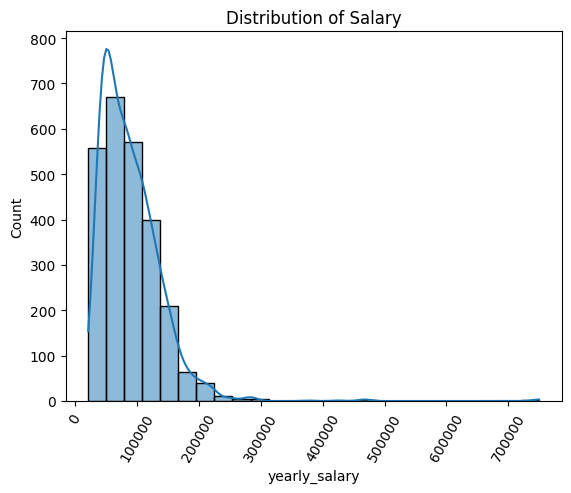

In [ ]:
sns.histplot(jobs['yearly_salary'], bins=25, kde=True)
plt.xticks(rotation=60)
plt.title('Distribution of Salary')

In [ ]:
print(jobs['yearly_salary'].max())

# Check salaries above $500,000
jobs[jobs['yearly_salary'] >= 250000]


750000


,title,work_type,remote_allowed,experience,yearly_salary,industry,company_size,state,benefits
28,Psychiatrist,Full-time,No,Mid-Senior level,468000,Mental Health Care,7,TX,Premium
165,Psychiatrist,Full-time,No,Mid-Senior level,468000,Staffing & Recruiting,2,NY,Premium
235,Senior Network Engineer,Full-time,No,Mid-Senior level,280800,Information Technology & Services,1,TX,Premium
239,Senior Network Engineer,Full-time,No,Mid-Senior level,280800,Information Technology & Services,7,MI,Standard
450,ServiceNow Platform Architect,Full-time,Yes,Mid-Senior level,250000,Information Technology & Services,5,VA,Basic
701,ServiceNow Platform Architect,Full-time,No,Mid-Senior level,250000,Staffing & Recruiting,7,CA,Premium
1016,Senior Network Engineer,Full-time,No,Mid-Senior level,280800,Information Technology & Services,6,VA,Premium
1054,Trial Attorney,Full-time,No,Mid-Senior level,287500,Law Practice,2,ME,Premium
1148,Software Engineer,Full-time,No,Mid-Senior level,375000,Staffing & Recruiting,7,FL,Premium
1154,Trial Attorney,Full-time,No,Mid-Senior level,287500,Law Practice,2,UT,Basic


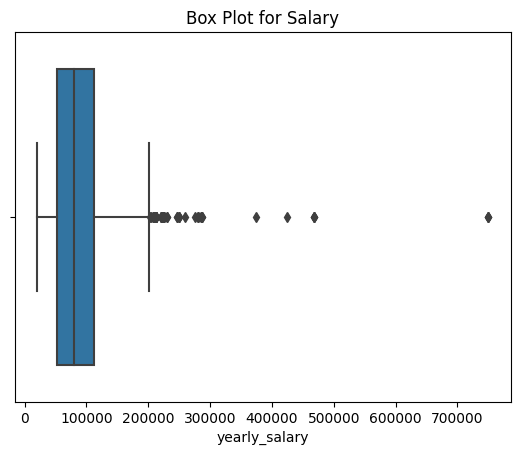

In [ ]:
sns.boxplot(x=jobs['yearly_salary'])
plt.title('Box Plot for Salary')
plt.show()

In [ ]:
jobs['yearly_salary'].mean()

89335.87071344107

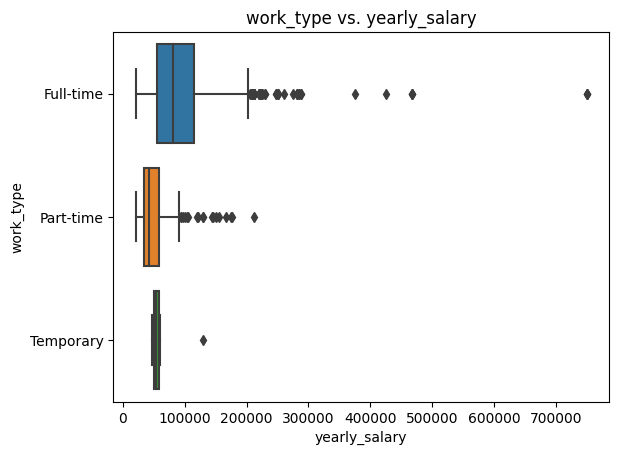

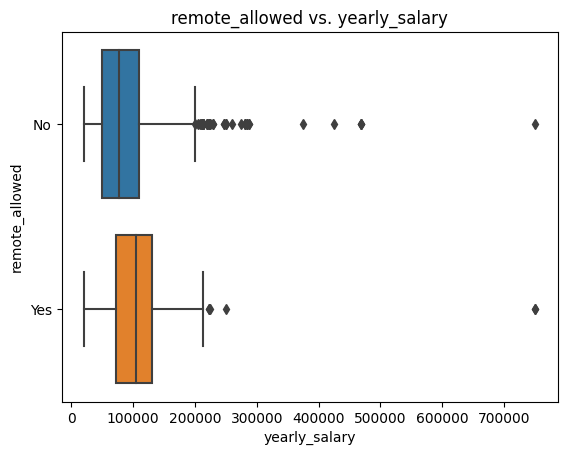

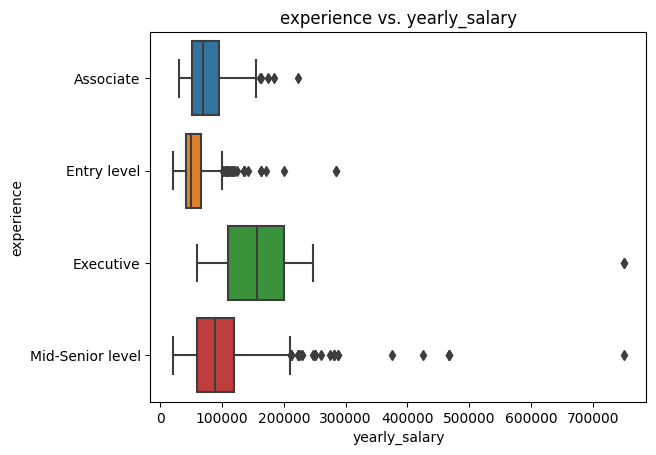

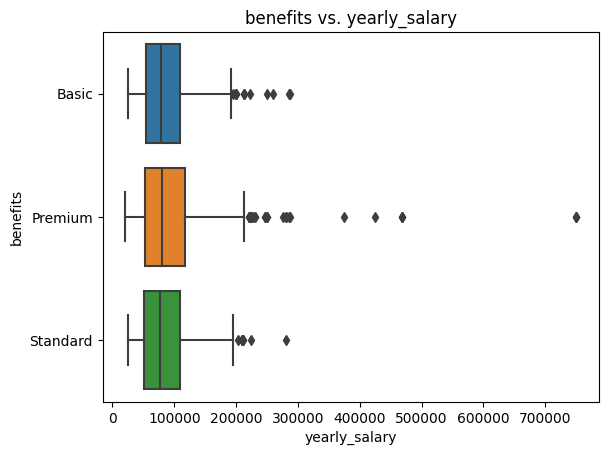

In [ ]:
# Explore the relationship between categorical variables and the target variable ('yearly_salary')
categorical_columns = ['work_type', 'remote_allowed', 'experience', 'benefits']

for i, column in enumerate(categorical_columns, start=1):
    sns.boxplot(x='yearly_salary', y=column, data=jobs)
    plt.title(f'{column} vs. yearly_salary')
    plt.show()


# **Outlier Detection**

I will keep these Outliers because:
1.  Genuine Data Points: They are represent valid and meaningful data points.
2.
Data Integrity: Removing the outliers may affect the natural variability in my dataset and distort the true distribution of the data.
3.  Relevant: They are relevant to the problem statement and removing them might lead to biased results.

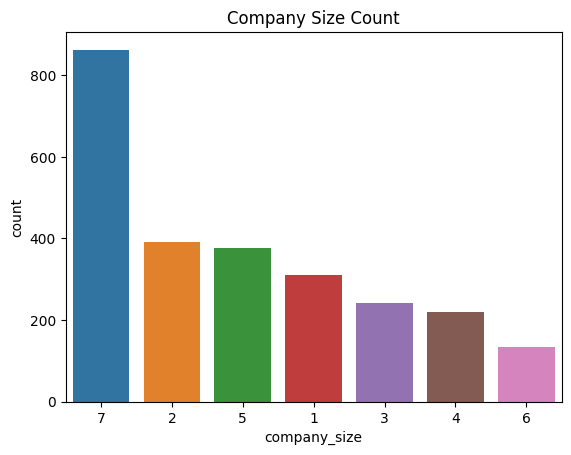

In [ ]:
sns.countplot(x=jobs['company_size'], order=jobs['company_size'].value_counts().index)
plt.title('Company Size Count')
plt.show()

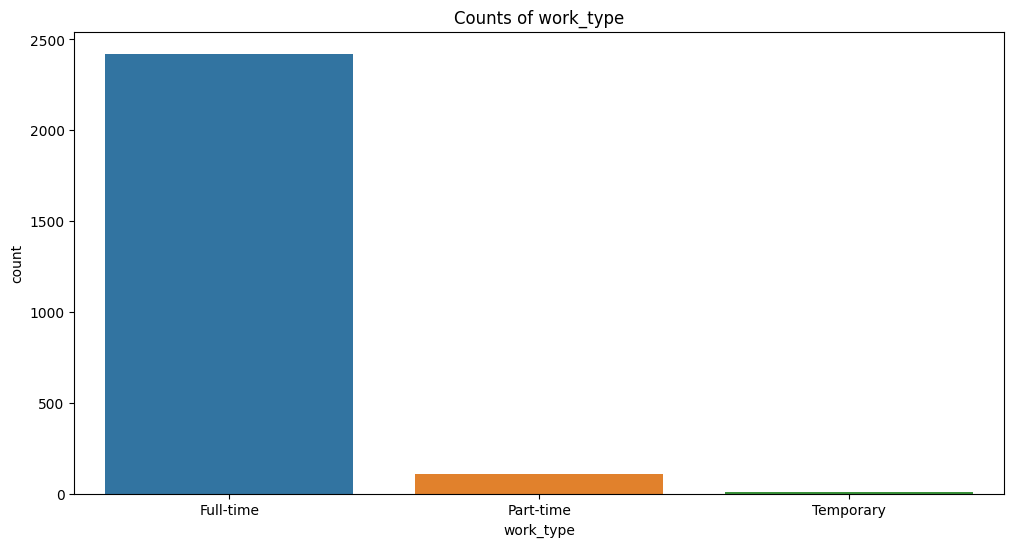

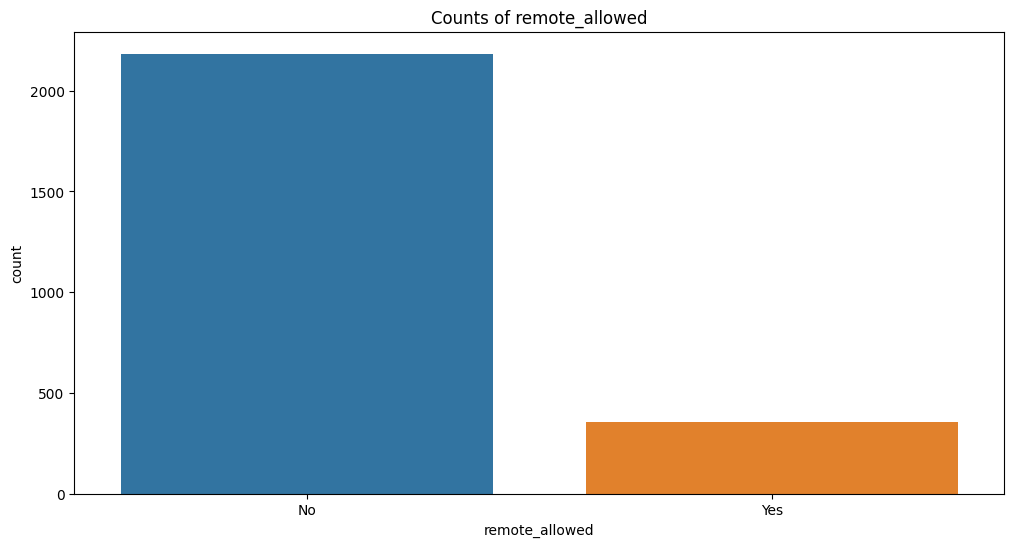

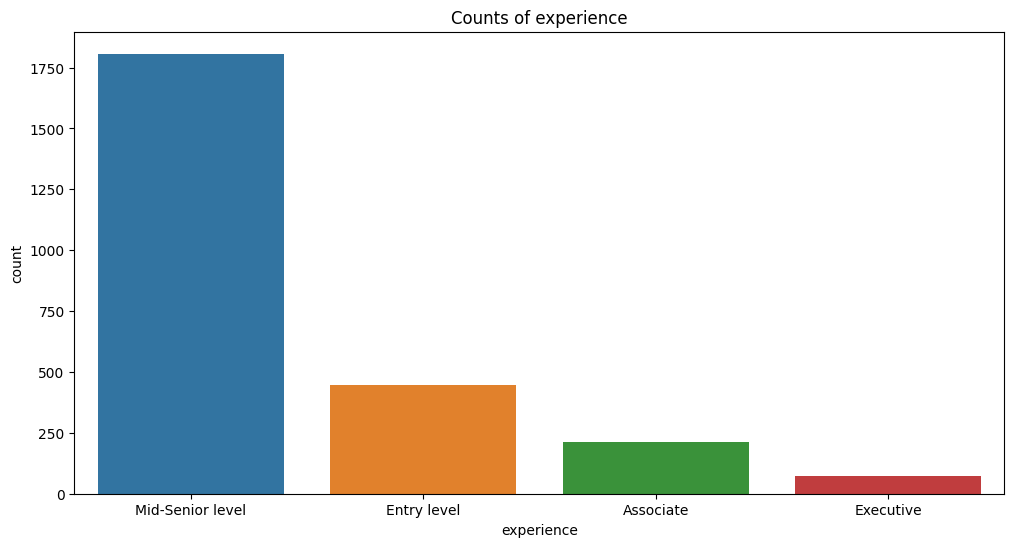

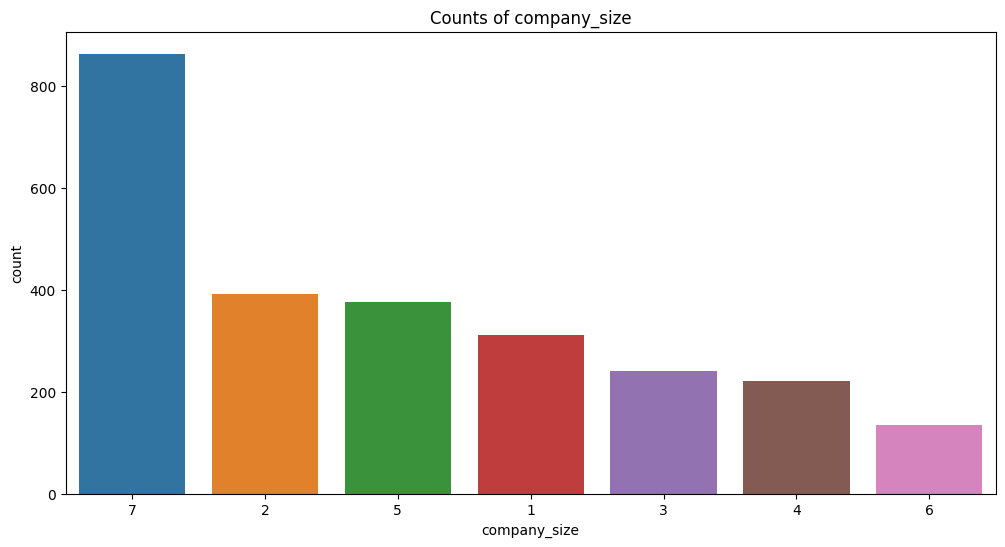

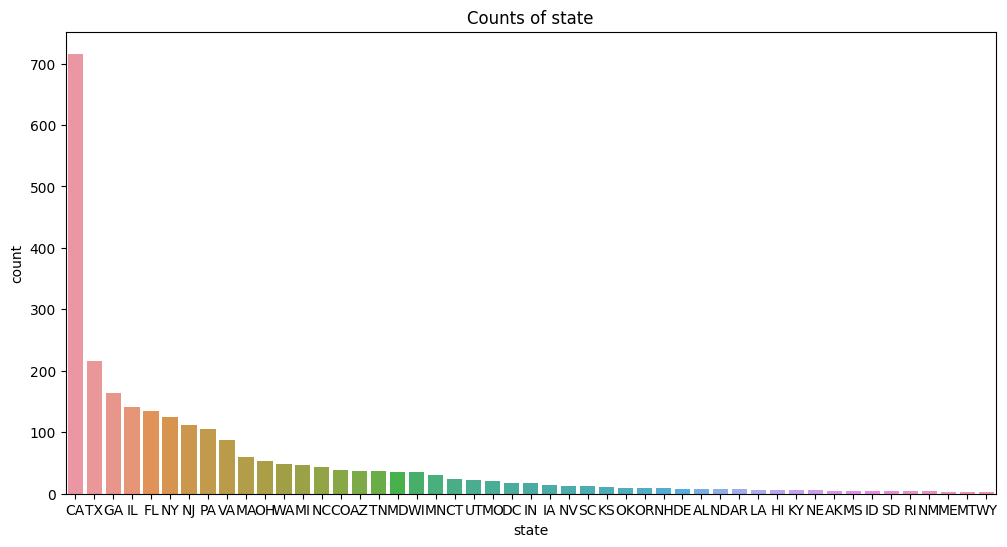

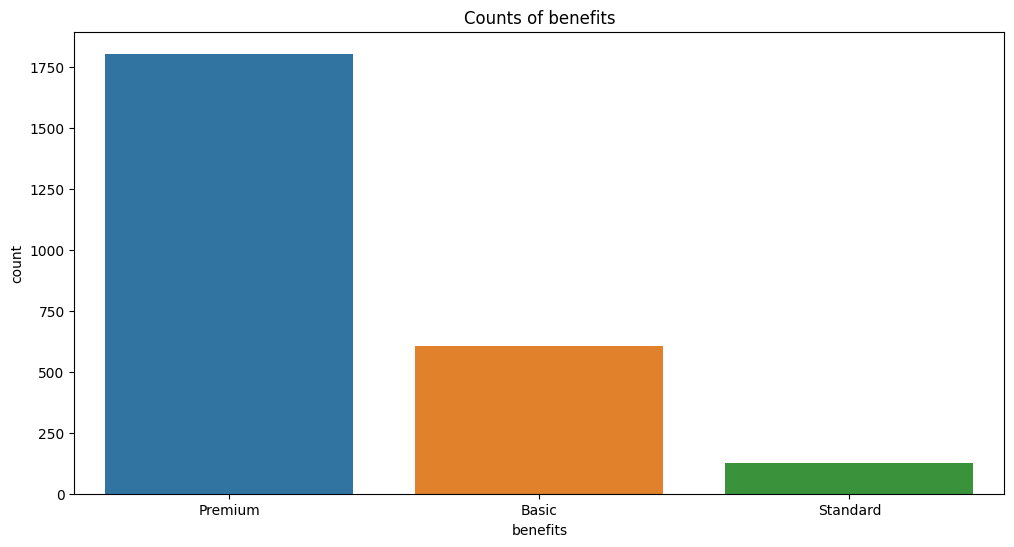

In [ ]:
#	View count plot for all categorical datatypes except title column
#https://python-reference.readthedocs.io/en/latest/docs/sets/difference.html


categorical_columns = ['work_type', 'remote_allowed', 'experience', 'company_size', 'state', 'benefits']

for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=jobs[column], order=jobs[column].value_counts().index)
    plt.title(f'Counts of {column}')
    plt.show()

# sns.countplot(x=jobs['work_type'], order=jobs['work_type'].value_counts().index)
# plt.title(f'Counts of {column}')
# plt.show()

In [ ]:
jobs['work_type'].value_counts()

Full-time    2422
Part-time     109
Temporary       6
Name: work_type, dtype: int64

# **Handling Imbalanced classes**

1.  work_type - a large number of 'Full-time' and much smaller counts for 'Part-time' and 'Temporary'
2.  experience - a large number of 'Mid-Senior level'
3.  company_size - a large number of '7'
4.  benefits - a large number of 'Premium'

These can impact the performance of machine learning models.

However, I intend to employ different algorithms that are inherently more robust to imbalanced datasets such as:

1.  Random Forests (Tree-based models):

Random Forests are an ensemble method that builds multiple decision trees and combines their predictions. They are less sensitive to class imbalance because each tree in the ensemble is exposed to a different subset of the data. They are robust to outliers and can capture non-linear relationships in the data.

2. Gradient Boosted Trees (Tree-based models) (e.g., XGBoost, LightGBM):

Similar to Random Forests, gradient boosted trees build trees sequentially, focusing on instances that were misclassified by previous trees. This makes them more robust to imbalanced datasets. It is robust to outliers and can handle complex relationships.

3.  K-Nearest Neighbors (KNN):

KNN can be effective when the dataset is not very large. KNN is a non-parametric algorithm, and it can be robust in capturing complex relationships in the data. Adjusting the number of neighbors and distances can help in handling imbalanced classes.

4.  Ridge Regression:

Ridge regression adds a regularization term to ordinary least squares, which can be useful for preventing overfitting and improving robustness.

<ipython-input-49-9d176fcc7600>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(jobs.corr(), annot=True, cmap='coolwarm', fmt='.2f')


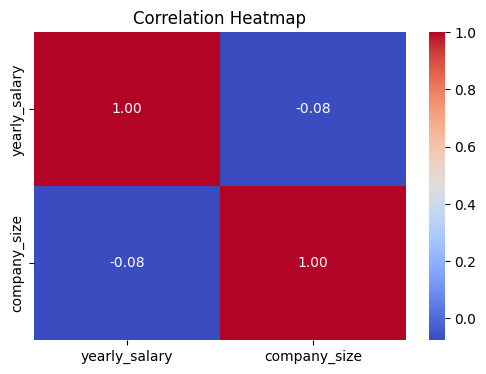

In [ ]:
# Explore relationships between variables
plt.figure(figsize=(6, 4))
sns.heatmap(jobs.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## **Data Encoding**

https://medium.com/aiskunks/categorical-data-encoding-techniques-d6296697a40f

https://towardsdatascience.com/6-ways-to-encode-features-for-machine-learning-algorithms-21593f6238b0

https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/


In [ ]:
!pip install category_encoders
import category_encoders as ce

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


**One-hot/Dummy Encoding**

This categorical data encoding technique when the features are nominal(do not have any order). A Binary Column is created for each Unique Category in the variable.

If a category is present in a sample, the corresponding column is set to 1, and all other columns are set to 0.

These newly created binary features are known as Dummy variables.

In one-hot encoding, for N categories in a variable, it uses N binary variables.

Dummy encoding is a small improvement over one-hot-encoding. It uses N-1 features to represent N labels/categories.

In [ ]:
#One-hot Encoding
jobs = pd.concat([jobs, pd.get_dummies(jobs['work_type'], prefix='work_type')], axis=1).drop(['work_type'], axis=1)

#Dummy Encoding
jobs = pd.concat([jobs, pd.get_dummies(jobs['remote_allowed'], drop_first=True, prefix='remote_allowed')], axis=1).drop(['remote_allowed'], axis=1)


**Target Encoding**

This is a more advanced encoding technique used for dealing with high cardinality categorical features.

It is suitable for capturing the relationship between categorical features and the target variable (but can lead to overfitting if not used with caution). It is primarily used for encoding categorical features when the target variable is available.

In [ ]:
jobs['title'] = ce.TargetEncoder(cols=['title']).fit_transform(jobs[['title']], jobs['yearly_salary'])['title']

jobs['industry'] = ce.TargetEncoder(cols=['industry']).fit_transform(jobs[['industry']], jobs['yearly_salary'])['industry']

jobs['state'] = ce.TargetEncoder(cols=['state']).fit_transform(jobs[['state']], jobs['yearly_salary'])['state']


**Label Encoding or Ordinal Encoding**

Label Encoding is a categorical data encoding technique that is used when the categorical feature is ordinal and it is important to retain this order. Each unique category is assigned a Unique Integer value.

Ordinal Encoding is used when the categories in a variable have a Natural Ordering. In this method, the categories are assigned a numerical value based on their order.

Label Encoding applies here.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
jobs['experience'] = le1.fit_transform(jobs['experience'])

le2 = LabelEncoder()
jobs['company_size'] = le2.fit_transform(jobs['company_size'])

le3 = LabelEncoder()
jobs['benefits'] = le3.fit_transform(jobs['benefits'])

jobs.head()

,title,experience,yearly_salary,industry,company_size,state,benefits,work_type_Full-time,work_type_Part-time,work_type_Temporary,remote_allowed_Yes
0,90407.255647,3,90000,71241.801483,0,97518.339385,0,1,0,0,0
1,88022.915596,3,80080,88131.603496,1,86937.819452,1,1,0,0,0
2,81049.961957,3,39500,54480.174230,1,86046.611589,1,1,0,0,0
3,84252.514291,3,53500,99427.868707,1,95241.978654,1,1,0,0,1
4,100499.782574,3,166400,88010.059730,1,86937.819452,1,1,0,0,0


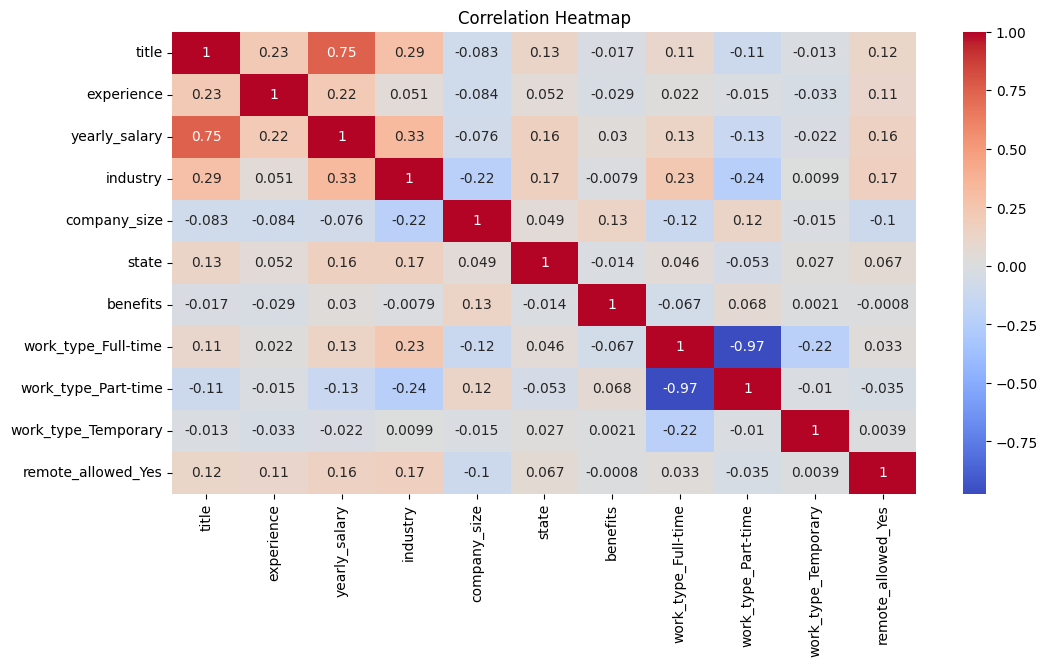

In [ ]:
correlation_matrix = jobs.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**High Correlation**


*   title and yearly_salary variables have a correlation coefficient of 0.75 which suggests a strong positive linear relationship, meaning that as one variable increases, the other variable tends to increase as well, and vice versa.

In predictive modeling, highly correlated predictors may introduce multicollinearity, impacting the stability and interpretability of regression models. However, based on the context of this dataset, level of experience can de deduced from a job title and the higher the level of experience, the higher the yearly salary.

*   work_type_Full-time and work_type_Part-time variables exhibit a strong negative correlation of -0.97. This indicates that as one variable increases, the other variable tends to decrease proportionally.

This negative correlation is meaningful and expected. Correlation does not imply causation. Even if two variables are strongly negatively correlated, it doesn't necessarily mean that one causes the other.


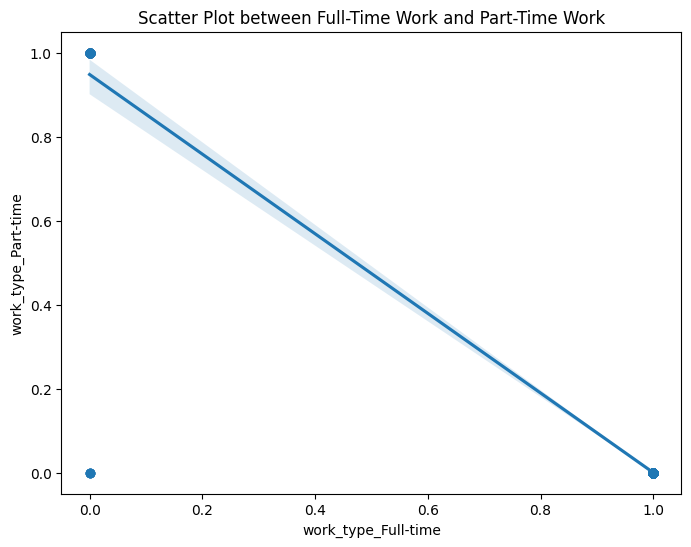

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x=jobs['work_type_Full-time'], y=jobs['work_type_Part-time'])
plt.title('Scatter Plot between Full-Time Work and Part-Time Work')
plt.show()

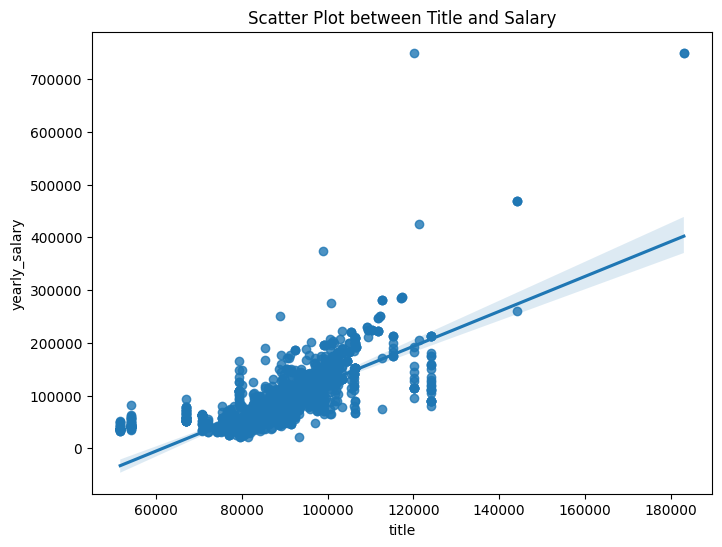

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x=jobs['title'], y=jobs['yearly_salary'])
plt.title('Scatter Plot between Title and Salary')
plt.show()

# **Machine Learning Models**

In [ ]:
# Import Libraries
#Crucial data processing and analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Loading the modules required to build and evaluate a Regression model
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
X = jobs.drop(['yearly_salary'], axis=1)
y = jobs['yearly_salary']

X.head()

,title,experience,industry,company_size,state,benefits,work_type_Full-time,work_type_Part-time,work_type_Temporary,remote_allowed_Yes
0,90407.255647,3,71241.801483,0,97518.339385,0,1,0,0,0
1,88022.915596,3,88131.603496,1,86937.819452,1,1,0,0,0
2,81049.961957,3,54480.174230,1,86046.611589,1,1,0,0,0
3,84252.514291,3,99427.868707,1,95241.978654,1,1,0,0,1
4,100499.782574,3,88010.059730,1,86937.819452,1,1,0,0,0


In [ ]:
#spliting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Standardization

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter Tuning and Training of Models

As explained earlier, Models to be considered are as follows:

1.   Linear Regression
2.   Ridge Regression
3.  K-Nearest Neighbors (KNN)
4.  Random Forests (Tree-based models):
5.  Gradient Boosted Trees


RandomizedSearchCV and GridSearchCV are both techniques used for hyperparameter tuning in machine learning.

**Grid Search**: For a relatively small hyperparameter space, and you want to be sure to explore every combination thoroughly.

**Randomized Search**: For large hyperparameter space, and you want to explore a diverse set of hyperparameter combinations without exhaustively searching through all possibilities.

**scoring='r2**

Scoring is the metric used to evaluate the performance of a model. The scoring parameter allows me to specify which metric to use for model evaluation.

The Negation of MSE (neg_mean_squared_error) is a scoring metric commonly used for regression problems. It means that the scoring function is configured to maximize the negation of the metric.
**Since MSE is a loss function (lower values are better), negating it turns it into a score where higher values are better.**

In the context of cross-validationfunction like RandomizedSearchCV or GridSearchCV, higher 'neg_mean_squared_error' scores indicate better performance. This means that the search will try to find hyperparameters that result in models with higher negation of mean squared error.

In [ ]:
# Define parameter grids for each model
param_randgrid_linear_reg = {}

param_randgrid_ridge = {
    'alpha': [0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 7.5, 10.0]
}

param_randgrid_knn = {
    'n_neighbors': [3, 5, 7, 10]
}

param_randgrid_random_forest = {
    'n_estimators': [50, 100, 150, 300, 450, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4]
}

param_randgrid_gradient_boosting = {
    'n_estimators': [50, 100, 150, 300, 450, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Perform Grid Search with Cross-Validation for each model
linear_reg = RandomizedSearchCV(LinearRegression(), param_randgrid_linear_reg, cv=3, scoring='r2')
ridge = RandomizedSearchCV(Ridge(), param_randgrid_ridge, cv=3, n_iter=20, random_state=23, scoring='r2')
knn = RandomizedSearchCV(KNeighborsRegressor(), param_randgrid_knn,cv=3, scoring='r2')
random_forest = RandomizedSearchCV(RandomForestRegressor(), param_randgrid_random_forest, cv=3, n_iter=20, random_state=23, scoring='r2')
gradient_boosting = RandomizedSearchCV(GradientBoostingRegressor(), param_randgrid_gradient_boosting, cv=3, n_iter=20, random_state=23, scoring='r2')

# Fit the models with the best hyperparameters
linear_reg.fit(X_train, y_train)
ridge.fit(X_train, y_train)
knn.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

# Get the best hyperparameters
best_params_linear_reg = linear_reg.best_params_
best_params_ridge = ridge.best_params_
best_params_knn = knn.best_params_
best_params_random_forest = random_forest.best_params_
best_params_gradient_boosting = gradient_boosting.best_params_

# Get the best models which will contain the best combination of hyperparameters found during the ramdomized search for each model
best_model_linear_reg = linear_reg.best_estimator_
best_model_ridge = ridge.best_estimator_
best_model_knn = knn.best_estimator_
best_model_random_forest = random_forest.best_estimator_
best_model_gradient_boosting = gradient_boosting.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=20. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
# Predict using the best models
y_pred_linear_reg = best_model_linear_reg.predict(X_test)
y_pred_ridge = best_model_ridge.predict(X_test)
y_pred_knn = best_model_knn.predict(X_test)
y_pred_random_forest = best_model_random_forest.predict(X_test)
y_pred_gradient_boosting = best_model_gradient_boosting.predict(X_test)

In [ ]:
# Evaluate the model

LinReg_mse = mean_squared_error(y_test, y_pred_linear_reg)
LinReg_r2 = r2_score(y_test, y_pred_linear_reg)

ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_r2 = r2_score(y_test, y_pred_knn)

rf_mse = mean_squared_error(y_test, y_pred_random_forest)
rf_r2 = r2_score(y_test, y_pred_random_forest)

# Evaluate Gradient Boosting Regressor
gb_mse = mean_squared_error(y_test, y_pred_gradient_boosting)
gb_r2 = r2_score(y_test, y_pred_gradient_boosting)

# Print the results
print("Linear Regression:")
print(f"Mean Squared Error: {LinReg_mse}")
print(f"R-squared (r2) Score: {LinReg_r2}")
print("\n")

print("Ridge Regression:")
print(f"Mean Squared Error: {ridge_mse}")
print(f"R-squared (r2) Score: {ridge_r2}")
print("\n")

print("KNN Regressor:")
print(f"Mean Squared Error: {knn_mse}")
print(f"R-squared (r2) Score: {knn_r2}")
print("\n")

print("Random Forest Regressor:")
print(f"Mean Squared Error: {rf_mse}")
print(f"R-squared (r2) Score: {rf_r2}")
print("\n")

print("Gradient Boosting Regressor:")
print(f"Mean Squared Error: {gb_mse}")
print(f"R-squared (r2) Score: {gb_r2}")




Linear Regression:
Mean Squared Error: 1177825216.1573114
R-squared (r2) Score: 0.6153085693955643


Ridge Regression:
Mean Squared Error: 1179195937.9528213
R-squared (r2) Score: 0.6148608756959884


KNN Regressor:
Mean Squared Error: 966089485.4660629
R-squared (r2) Score: 0.6844639245639945


Random Forest Regressor:
Mean Squared Error: 612774620.5733218
R-squared (r2) Score: 0.7998606735594314


Gradient Boosting Regressor:
Mean Squared Error: 520906250.566398
R-squared (r2) Score: 0.8298659529510224


In [ ]:
#Perform cross-validation and calculate the mean r2 score (the goodness of fit of the model) for the different regression models.
#provides an indication of how well the model fits the data, with higher values indicating better fit.
#The output helps to understand which model performs better on the given training data.
from sklearn.model_selection import cross_val_score

models = [
    ('Linear Regression', best_model_linear_reg),
    ('Ridge Regression', best_model_ridge),
    ('KNN Regressor', best_model_knn),
    ('Random Forest Regressor', best_model_random_forest),
    ('Gradient Boosting Regressor', best_model_gradient_boosting)
]

for name, model in models:
    result = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
    print(name, ':', result.mean())


Linear Regression : 0.5759685767661269
Ridge Regression : 0.5762689924485016
KNN Regressor : 0.5750140045555561
Random Forest Regressor : 0.732914508238466
Gradient Boosting Regressor : 0.7097097603990794


# Feature Importance

               Feature    Importance
0                title  8.592632e-01
2             industry  6.595654e-02
4                state  2.702828e-02
3         company_size  1.971075e-02
1           experience  1.524186e-02
5             benefits  6.594496e-03
9   remote_allowed_Yes  5.531461e-03
7  work_type_Part-time  3.942384e-04
6  work_type_Full-time  2.787416e-04
8  work_type_Temporary  4.256132e-07


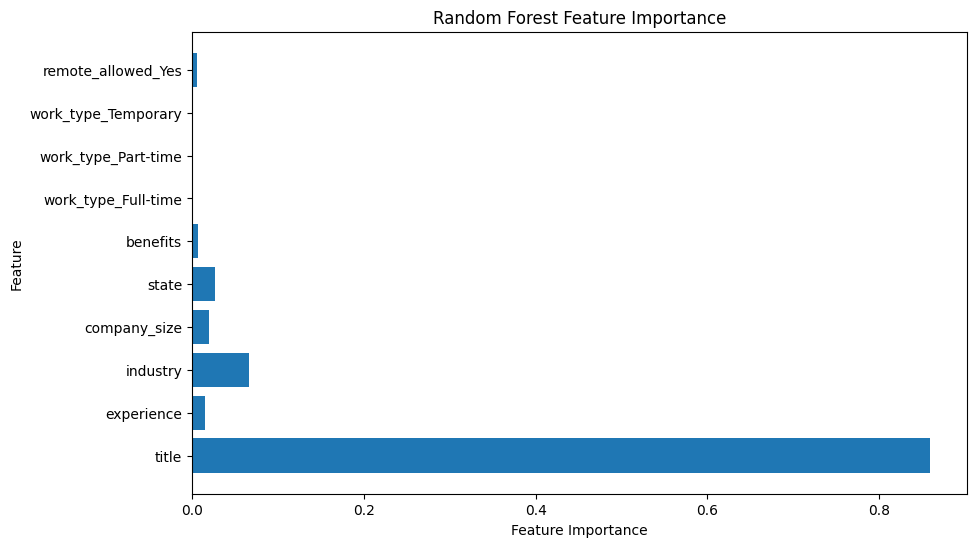

In [ ]:
feature_importance = best_model_random_forest.feature_importances_
feature_names = X.columns

# Create and view DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

               Feature  Importance
0                title    0.875820
2             industry    0.071783
1           experience    0.021518
5             benefits    0.011400
9   remote_allowed_Yes    0.009393
3         company_size    0.005833
4                state    0.003346
7  work_type_Part-time    0.000908
6  work_type_Full-time    0.000000
8  work_type_Temporary    0.000000


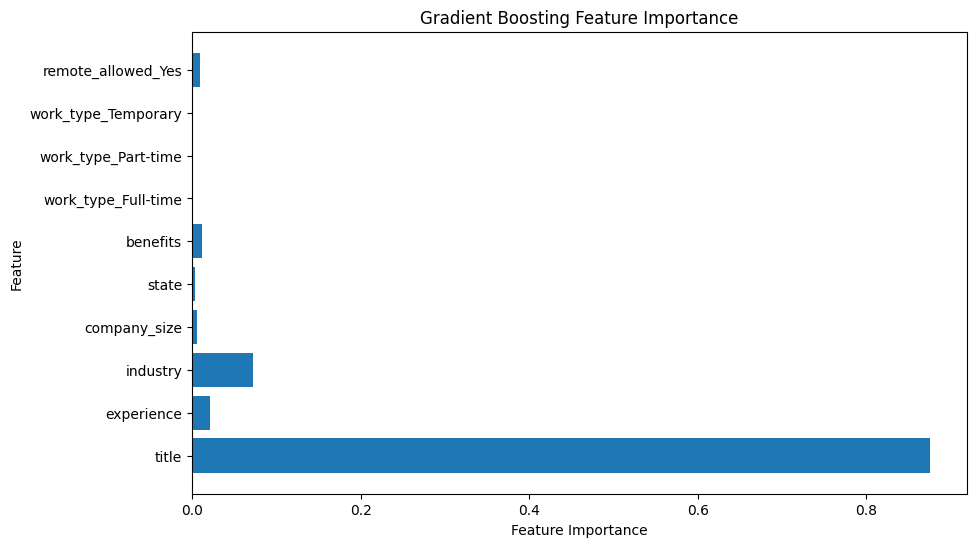

In [ ]:
feature_importance = best_model_gradient_boosting.feature_importances_
feature_names = X.columns

# Create and view DataFrame for feature importances
feature_importance_df2 = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})
feature_importance_df2 = feature_importance_df2.sort_values(by='Importance', ascending=False)
print(feature_importance_df2)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Feature Importance')
plt.show()

# **Explanation**

**Metrics**

Random Forest Regressor:


*   Mean Squared Error (MSE): 612,774,620.57
*   R-squared (r2) Score: 0.7999
*   Cross-validation Score: 0.7329


Gradient Boosting Regressor:

* Mean Squared Error (MSE): 520,906,250.57

* R-squared (r2) Score: 0.8299

* Cross-validation Score: 0.7097

**Model Comparison**

Metrics/results are compared between the Random Forest Regressor and Gradient Boosting Regressor, as both models had the best performnce out of the 5 models.

1.  Mean Squared Error (MSE):

Lower MSE indicates better model performance. In this case, Gradient Boosting has a lower MSE compared to Random Forest. Therefore, Gradient Boosting performs better in terms of minimizing prediction errors.

2.  R-squared (r2) Score:

R-squared measures how well the model explains the variance in the target variable. Higher R-squared indicates a better fit. Gradient Boosting has a higher R-squared (0.8299) compared to Random Forest (0.7999), suggesting that Gradient Boosting explains more of the variance in the target variable.

3.  Cross-validation Score:

Cross-validation provides an estimate of how well the model generalizes to unseen data. The cross-validation score is slightly higher for Random Forest compared to Gradient Boosting . However, we cannot directly compare the absolute values of cross-validation scores between models.

**Model Selection**

* Both models perform well, but based on the considered metrics, Gradient Boosting Regressor seems to be the better choice. It has lower Mean Squared Error, a higher R-squared score, and a slightly lower cross-validation score. Gradient Boosting is often preferred for its ability to capture complex relationships in the data, and in this case, it appears to provide a good fit to the training data.

* Based on the analysis, Gradient Boosting Regressor is identified as the preferred model due to lower MSE, higher R-squared, and acceptable cross-validation score.

* The machine learning model, Gradient Boosting Regressor, provides a solid foundation for predicting salaries in the United States.

**Potential Steps and Obstacles:**

1.  Further Evaluation: further evaluation the models on a test dataset is important to confirm their performance on unseen data.

2.  Model Interpretability: Improving model interpretability is important, especially since the model is intended for use by hiring managers who may need insights into how features contribute to salary predictions.

3.  Fine-Tuning: Explore opportunities for hyperparameter tuning to potentially enhance model performance.

4.  Data Quality: Improve data quality used for training and testing the model. Address any missing values or outliers that might affect model performance.

5.  User Feedback: Collect feedback from hiring managers using the model to identify areas for improvement and additional features that could enhance prediction accuracy.

In [ ]:
!pip install joblib

In [ ]:
import joblib

In [ ]:
#Save chosen model to a .pkl file
model = best_model_gradient_boosting
model_filename = 'gradient_boosting_regressor_salary_prediction_model.pkl'
joblib.dump(model, model_filename)

['gradient_boosting_regressor_salary_prediction_model.pkl']

**User Testing**

In [ ]:
# Load the saved model
saved_model = joblib.load('gradient_boosting_regressor_salary_prediction_model.pkl')

# Create a DataFrame with a single data point
user_data = pd.DataFrame({
    'title': ['Sales Representative'],
    'experience': [3],
    'industry': ['Real Estate'],
    'state': ['NY'],
    'company_size': [2],
    'benefits': [1],
    'work_type_Full-time': [1],
    'work_type_Part-time': [0],
    'work_type_Temporary': [0],
    'remote_allowed_Yes': [0]
})

#Encoding
user_data['industry'] = ce.TargetEncoder(cols=['industry']).fit(jobs[['industry']], jobs['yearly_salary']).transform(user_data[['industry']])['industry']
user_data['state'] = ce.TargetEncoder(cols=['state']).fit(jobs[['state']], jobs['yearly_salary']).transform(user_data[['state']])['state']
user_data['title'] = ce.TargetEncoder(cols=['title']).fit(jobs[['title']], jobs['yearly_salary']).transform(user_data[['title']])['title']
#user_data['experience'] = LabelEncoder().fit_transform(user_data['experience'])
#user_data['company_size'] = LabelEncoder().fit_transform(user_data['company_size'])
#user_data['benefits'] = LabelEncoder().fit_transform(user_data['benefits'])
#user_data = pd.concat([user_data, pd.get_dummies(user_data['work_type'], prefix='work_type')], axis=1).drop(['work_type'], axis=1)
#user_data = pd.concat([user_data, pd.get_dummies(user_data['remote_allowed'], drop_first=True, prefix='remote_allowed')], axis=1).drop(['remote_allowed'], axis=1)

# Make predictions on the single data point
prediction = saved_model.predict(user_data)

# Print the predicted salary
print(f'Predicted Salary: {prediction[0]}')

Predicted Salary: 814592.4657078146


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
